In [3]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# count classes 
def count_classes(split, data_dir):
    label_dir = os.path.join(data_dir, split, 'labels')
    class_counts = Counter()
    
    for label_file in os.listdir(label_dir):
        file_path = os.path.join(label_dir, label_file)
        with open(file_path, 'r') as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1
    return class_counts

In [8]:
# root directory
data_dir = 'datasets/aquarium-data-cots/aquarium_pretrain'
splits = ['train', 'valid', 'test']

# classes
classes = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

# for each split, count
all_counts = {split: count_classes(split, data_dir=data_dir) for split in splits}

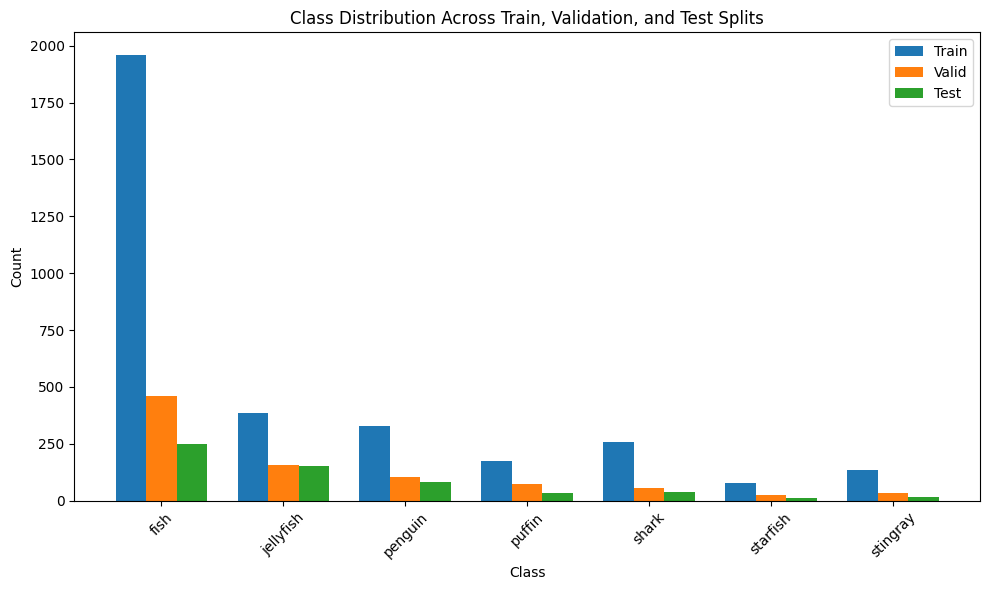

In [9]:
# plot
class_indices = range(len(classes))
counts_by_split = {split: [all_counts[split].get(i, 0) for i in class_indices] for split in splits}

x = np.arange(len(classes))  # x posiiton
width = 0.25  # w

fig, ax = plt.subplots(figsize=(10, 6))
for i, split in enumerate(splits):
    ax.bar(x + i * width, counts_by_split[split], width, label=split.capitalize())

ax.set_title("Class Distribution Across Train, Validation, and Test Splits")
ax.set_ylabel("Count")
ax.set_xlabel("Class")
ax.set_xticks(x + width)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()